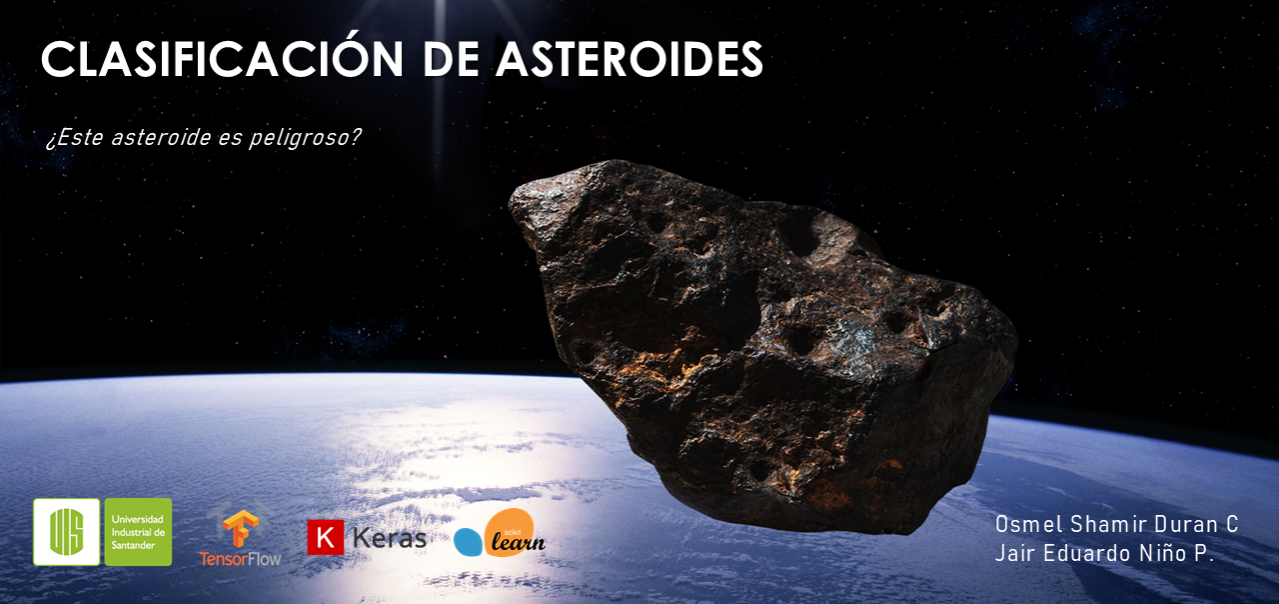

In [8]:
#@title # PROYECTO DE IA - CLASIFICACIÓN DE ASTEROIDES { display-mode: "form" }
from IPython.display import Image 
Image(filename='img/baner.png',width=800, height=400)

## Video explicativo

https://www.youtube.com/watch?v=frMd23a7Jis&t=1s

## Objetivo

* El objetivo de este proyecto es clasificar asteroides como peligrosos. Para esto se se usa un dataset que contiene datos y mediciones de los asteroides que han sido descubiertos y estudiados por la NASA (data 2018).

Link del dataset:
https://www.kaggle.com/shrutimehta/nasa-asteroids-classification/notebooks

Primero se analisara los datos, se realizara el tratamiendo de ser necesario y luego se creara el modelo para clasificarlos.







Integrantes
- Osmel Shamir Duran Castro
- Jair Eduardo Niño Panqueva

In [5]:
# montando el drive
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/IA-PROYECTO')
print(os.getcwd())

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/IA-PROYECTO


In [6]:
# carga de librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# DESCRIPCIÓN DEL DATASET

Como se dijo anteriormente, los datos que contiene el data set son de los estudios que la NASA a realizado a los asteroides que han descubierto, entre estos datos tenemos:

- **Neo Reference ID:** Es el identificador asignado a un asteroide.
- **Name:** Denota el nombre dado al asteroide.
- **Absolute Magnitude:** Magnitud absoluta del asteroide.
- **Est Dia in KM(max):** Diámetro estimado máximo del asteroide en kilómetros. También encontramos esta característica en diferentes unidades como:
 * Metros
 * Millas
 * Pies

- **Est Dia in KM(min):** Diámetro estimado mínimo del asteroide en kilómetros. También encontramos esta característica en diferentes unidades como:
  * Metros
  * Millas
  * Pies
- **Relative Velocity km per sec:** Velocidad relativa del asteroide en kilómetros por segundo. También encontramos esta característica en diferentes unidades como:
 * Kilometros por hora (km/h).
 * Millas por hora.
- **Orbiting Body:**  Planeta alrededor del cual gira el asteroide.
- **Jupiter Tisserand Invariant:** esta característica denota el parámetro de Tisserand para el asteroide, parametro que se utiliza para distinguir diferentes tipos de órbitas.<br>
  *Nota: El parámetro de Tisserand (o invariante de Tisserand) es un valor calculado a partir de varios elementos orbitales (semieje mayor, excentricidad orbital e inclinación) de un objeto relativamente pequeño y un "cuerpo perturbador" más sustancial.*
- **Eccentricity:** Denota el valor de la excentricidad de la órbita del asteroide.
- **Semi Major Axis:** Denota el valor del Semi Eje Mayor de la órbita del asteroide.
- **Orbital Period:** Tiempo que tarda el asteroide en hacer una revolución completa alrededor de su cuerpo en órbita.
- **Perihelion Distance:** Indica el valor de la distancia del perihelio del asteroide (punto en el que es más cercano al sol).
- **Aphelion Dist:** Indica el valor de la distancia del afelio del asteroide (punto más lejano del sol).
- **Hazardous** Boolean que indica si el asteroide es peligroso o no. **Esta columna sera usada como label para los modelos**.



In [ ]:
dt = pd.read_csv("data/nasa.csv")
dt.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


Tamaño del dataset:

In [ ]:
# obtenemos el tamaño del dataset
dt.shape

(4687, 40)

## Apofis

Apofis (Apophis en ingles y apodado el Dios del Caos) es un asteroide descubierto en 2004 que es considerado uno de los más peligrosos para nuestra civilización. Apofis se trata de un cuerpo de 340 metros de ancho que en caso de colisión tendría una potencia 15.000 veces mayor que la bomba atómica de Hiroshima.

Este asteroide pasara muy cerca de la Tierra el 13 de abril de 2029 según cálculos de la NASA, sin embargo, han aclarado que en esta ocasión la probabilidad de que colisione es de 1 entre 100.000, por lo que no hay de que preocuparse,


In [ ]:
# Datos de Apophis. Se muestran dos registros que contienen datos de fechas diferentes en los que se observo el asteroide
apophis = dt[dt["Neo Reference ID"] == 2099942]
apophis

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
1788,2099942,2099942,19.7,0.305179,0.682402,305.179233,682.401509,0.18963,0.424025,1001.244233,2238.850168,2005-08-08,1123484400000,8.099261,29157.339418,18117.236818,0.267891,104.209480,40075876.0,24901996.0,Earth,193,2014-10-09 14:48:04,0,0.000659,6.467,2454441.5,0.19108,0.922279,3.33129,204.45719,323.513069,0.74605,126.393641,1.098507,2.454571e+06,215.539978,1.112783,J2000,True
3649,2099942,2099942,19.7,0.305179,0.682402,305.179233,682.401509,0.18963,0.424025,1001.244233,2238.850168,2013-07-08,1373266800000,6.727417,24218.702846,15048.560110,0.243307,94.646584,36398272.0,22616838.0,Earth,193,2014-10-09 14:48:04,0,0.000659,6.467,2454441.5,0.19108,0.922279,3.33129,204.45719,323.513069,0.74605,126.393641,1.098507,2.454571e+06,215.539978,1.112783,J2000,True


# ANÁLISIS DE DATOS

**Si observamos los datos que contiene el dataset, vemos que hay algunas columnas que contienen un identificador o información que no es necesaria para el modelo de clasificación, las columnas que contienen fechas tampoco son necesarias clasificar la peligrosidad. Por tanto, algunas columnas seran eliminadas.**

In [ ]:
# eliminando columnas sin relativa importancia
del dt["Neo Reference ID"], dt["Name"], dt["Close Approach Date"], dt["Epoch Date Close Approach"], dt["Orbit ID"], dt["Orbit Determination Date"]

del apophis["Neo Reference ID"], apophis["Name"], apophis["Close Approach Date"], apophis["Epoch Date Close Approach"], apophis["Orbit ID"], apophis["Orbit Determination Date"]

In [ ]:
dt.head(10)

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
5,19.6,0.319562,0.714562,319.561887,714.562102,0.198566,0.444008,1048.431420,2344.363926,10.808844,38911.838251,24178.303051,0.392785,152.793274,58759768.0,36511628.0,Earth,1,0.272213,4.724,2458000.5,0.563441,1.323532,17.927751,178.971951,556.160556,0.577800,198.145969,2.069265,2.458009e+06,354.237368,0.647295,J2000,False
6,19.6,0.319562,0.714562,319.561887,714.562102,0.198566,0.444008,1048.431420,2344.363926,10.808842,38911.829716,24178.297748,0.392783,152.792664,58759532.0,36511480.0,Earth,1,0.272213,4.724,2458000.5,0.563441,1.323532,17.927748,178.971953,556.160544,0.577800,198.145960,2.069265,2.458009e+06,354.237396,0.647295,J2000,False
7,19.2,0.384198,0.859093,384.197891,859.092601,0.238729,0.533815,1260.491809,2818.545370,24.421884,87918.782382,54629.312308,0.129179,50.250694,19324928.0,12007954.0,Earth,0,0.098758,4.921,2458000.5,0.449763,1.237475,34.695127,112.562984,502.808758,0.680905,288.374651,1.794045,2.458242e+06,186.776932,0.715978,J2000,False
8,17.8,0.732074,1.636967,732.073989,1636.967205,0.454890,1.017164,2401.817627,5370.627484,17.373784,62545.621813,38863.417065,0.358283,139.372055,53598364.0,33304478.0,Earth,0,0.109354,5.386,2458000.5,0.238179,1.145551,22.215210,80.211132,447.837013,0.872705,353.422394,1.418397,2.458222e+06,182.236432,0.803864,J2000,False
9,21.5,0.133216,0.297879,133.215567,297.879063,0.082776,0.185093,437.058960,977.293544,12.899610,46438.594999,28855.136987,0.151806,59.052433,22709816.0,14111226.0,Earth,0,0.016907,6.623,2458000.5,0.551389,0.876125,2.059577,2.613682,299.535161,0.393040,253.765937,1.359211,2.457901e+06,119.861382,1.201862,J2000,True


Seguimos mirando la información que hay, la columna **Orbiting Body** y **Equinox** aparentemente contienen solo un dato.

In [ ]:
print("Orbiting body : " , dt["Orbiting Body"].unique())
print("Equinox : " , dt["Equinox"].unique())

Orbiting body :  ['Earth']
Equinox :  ['J2000']


Como solo poseen un dato se pueden eliminar.

In [ ]:
del dt["Orbiting Body"], dt["Equinox"]
del apophis["Orbiting Body"], apophis["Equinox"]

In [ ]:
# ver si hay nulos
print(dt.isnull().sum())

Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination                     0
Asc Node Longitude              0
Orbital Period                  0
Perihelion Distance             0
Perihelion Arg                  0
Aphelion Dist                   0
Perihelion Time                 0
Mean Anomaly  

In [ ]:
# info sobre los datos
dt.describe()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,1501.013521,13.970811,50294.919829,31251.307268,0.256778,99.886706,3.841347e+07,2.386902e+07,3.516962,0.082320,5.056111,2.457724e+06,0.382569,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,2711.257465,7.293223,26255.601377,16314.209644,0.145798,56.715493,2.181110e+07,1.355279e+07,3.078307,0.090300,1.237818,9.202975e+02,0.180444,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,7.413530,0.335504,1207.814804,750.489149,0.000178,0.069194,2.660989e+04,1.653462e+04,0.000000,0.000002,2.196000,2.450164e+06,0.007522,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,245.485039,8.432865,30358.313370,18863.475327,0.133420,51.900211,1.995928e+07,1.240212e+07,0.000000,0.014585,4.049500,2.458000e+06,0.240858,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,812.877364,12.917889,46504.401181,28896.026390,0.265029,103.096123,3.964771e+07,2.463595e+07,3.000000,0.047365,5.071000,2.458000e+06,0.372450,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,1862.194459,18.077649,65079.535405,40437.892430,0.384154,149.435921,5.746863e+07,3.570935e+07,6.000000,0.123593,6.019000,2.458000e+06,0.512411,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,114294.420501,44.633747,160681.487851,99841.227826,0.499884,194.454910,7.478160e+07,4.646713e+07,9.000000,0.477891,9.025000,2.458020e+06,0.960261,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


# Analisis de correlación

Con el dataset ya un poco más limpio procedemos a ver la correlación entre los datos

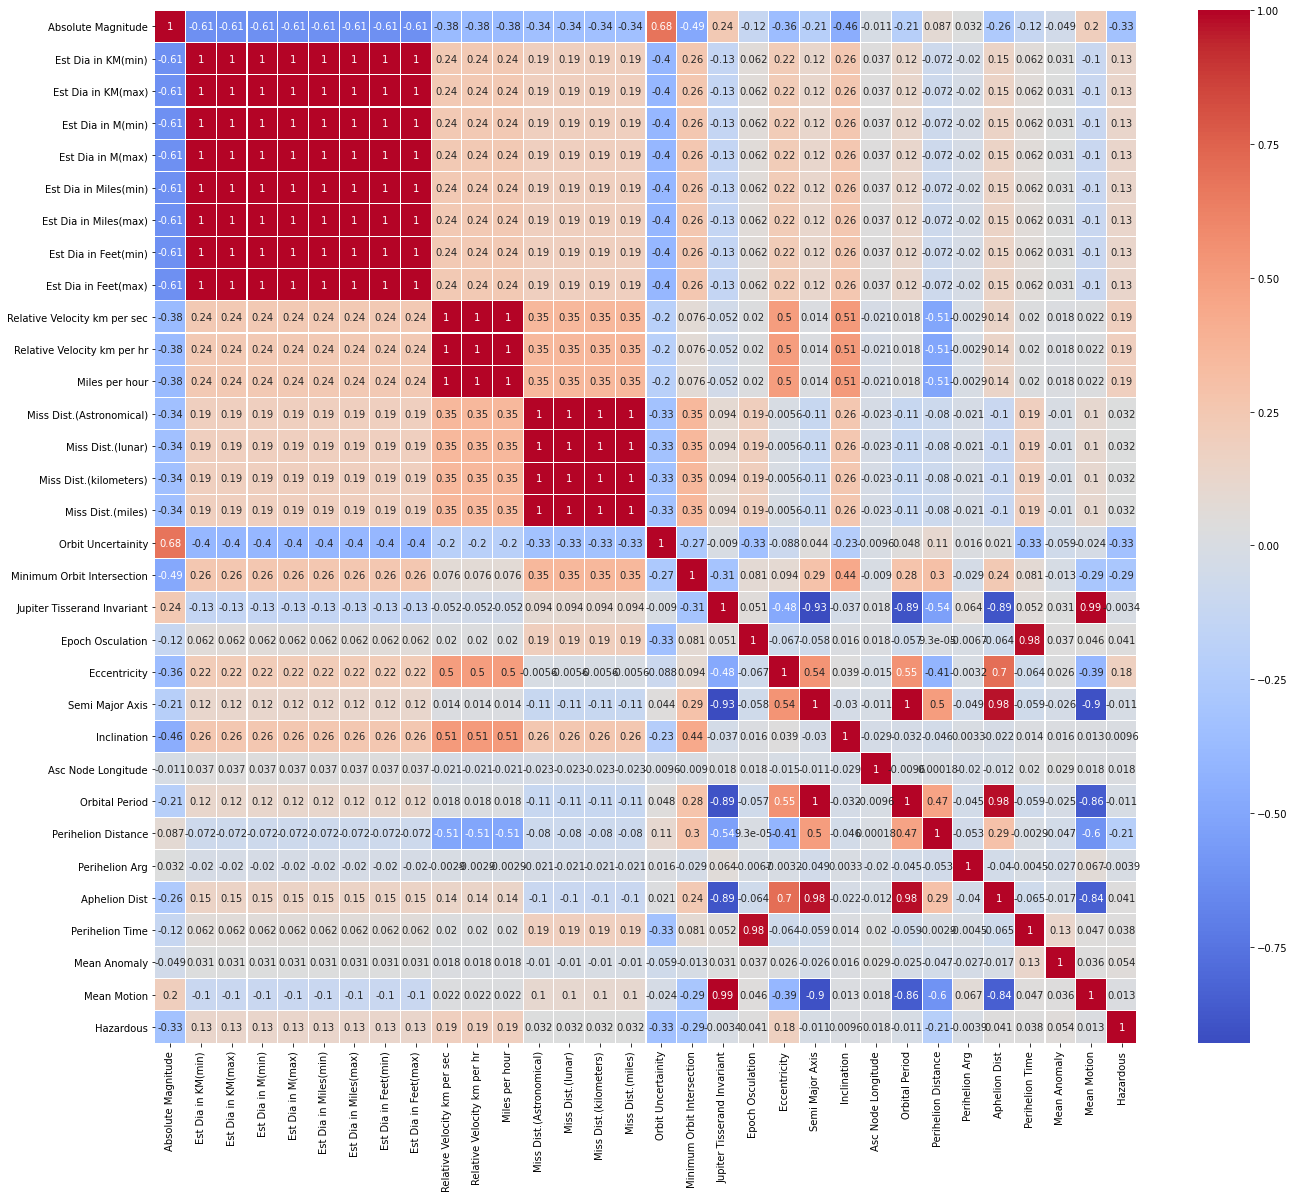

In [ ]:
plt.figure(figsize=(22,19))
sns.heatmap(data = dt.corr(), annot=True, linewidths=.1, cmap='coolwarm')

Segun los valores de correlación varias columnas tiene una correlación de valor '1', lo que significa que cuando una aumenta la otra también. 

Si miramos nuevamente el contenido de estas columnas nos damos cuenta que contienen la misma información pero en otras unidades. Uno de estos casos es *Est Dia in KM (Max)* y *Est Dia in M(max)*. De acuerdo a la descripción proporcionada por la persona que compartio el dataset, las columnas *Est Dia in XX* se refiere al diametro de los asteroides.

In [ ]:
dt[["Est Dia in KM(min)", 
    "Est Dia in M(min)", 
    "Est Dia in Miles(min)", 
    "Est Dia in Feet(min)", 
    "Est Dia in KM(max)", 
    "Est Dia in M(max)", 
    "Est Dia in Miles(max)", 
    "Est Dia in Feet(max)"]].head()

,Est Dia in KM(min),Est Dia in M(min),Est Dia in Miles(min),Est Dia in Feet(min),Est Dia in KM(max),Est Dia in M(max),Est Dia in Miles(max),Est Dia in Feet(max)
0,0.127220,127.219879,0.079051,417.388066,0.284472,284.472297,0.176763,933.308089
1,0.146068,146.067964,0.090762,479.225620,0.326618,326.617897,0.202951,1071.581063
2,0.231502,231.502122,0.143849,759.521423,0.517654,517.654482,0.321655,1698.341531
3,0.008801,8.801465,0.005469,28.876199,0.019681,19.680675,0.012229,64.569144
4,0.127220,127.219879,0.079051,417.388066,0.284472,284.472297,0.176763,933.308089


En las otras columnas de correlación 1 la situación es igual, asi que las eliminaremos

In [ ]:
# dejamos el diametro solo en Kilometros, tambien se elimina Est Dia in KM(min) ya que tiene correlacion 1 con Est Dia in KM(max)
del dt["Est Dia in M(max)"], dt["Est Dia in Miles(max)"], dt["Est Dia in Feet(max)"], dt["Est Dia in KM(min)"], dt["Est Dia in M(min)"], dt["Est Dia in Miles(min)"], dt["Est Dia in Feet(min)"]
del apophis["Est Dia in M(max)"], apophis["Est Dia in Miles(max)"], apophis["Est Dia in Feet(max)"], apophis["Est Dia in KM(min)"], apophis["Est Dia in M(min)"], apophis["Est Dia in Miles(min)"], apophis["Est Dia in Feet(min)"]

In [ ]:
# dejamos velocidad en km/h
del dt["Relative Velocity km per sec"], dt["Miles per hour"]
del apophis["Relative Velocity km per sec"], apophis["Miles per hour"]

In [ ]:
# dejamos miss dist en km
del dt["Miss Dist.(lunar)"], dt["Miss Dist.(miles)"], dt["Miss Dist.(Astronomical)"]
del apophis["Miss Dist.(lunar)"], apophis["Miss Dist.(miles)"], apophis["Miss Dist.(Astronomical)"]

In [ ]:
# eliminamos cualquier otra columna con correlación de 1
del dt["Semi Major Axis"]
del apophis["Semi Major Axis"]

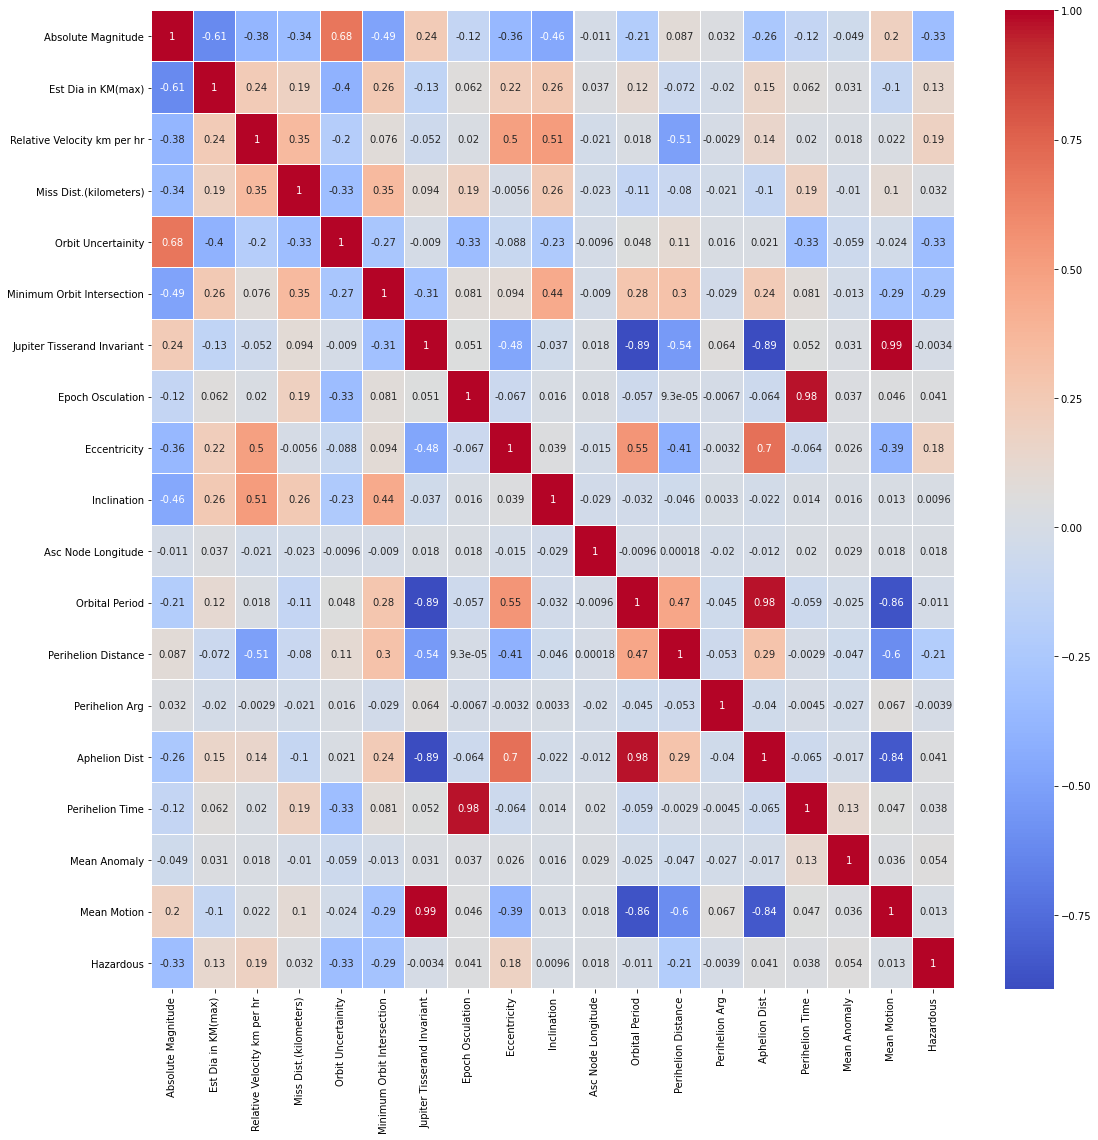

In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(data = dt.corr(), annot=True, linewidths=.1, cmap='coolwarm')

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Absolute Magnitude           4687 non-null   float64
 1   Est Dia in KM(max)           4687 non-null   float64
 2   Relative Velocity km per hr  4687 non-null   float64
 3   Miss Dist.(kilometers)       4687 non-null   float64
 4   Orbit Uncertainity           4687 non-null   int64  
 5   Minimum Orbit Intersection   4687 non-null   float64
 6   Jupiter Tisserand Invariant  4687 non-null   float64
 7   Epoch Osculation             4687 non-null   float64
 8   Eccentricity                 4687 non-null   float64
 9   Inclination                  4687 non-null   float64
 10  Asc Node Longitude           4687 non-null   float64
 11  Orbital Period               4687 non-null   float64
 12  Perihelion Distance          4687 non-null   float64
 13  Perihelion Arg    

Cambiamos de bool a entero la columna con las etiquetas de peligrosidad.

In [ ]:
dt["Hazardous"] = dt["Hazardous"].astype(int)
apophis["Hazardous"] = apophis["Hazardous"].astype(int)
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Absolute Magnitude           4687 non-null   float64
 1   Est Dia in KM(max)           4687 non-null   float64
 2   Relative Velocity km per hr  4687 non-null   float64
 3   Miss Dist.(kilometers)       4687 non-null   float64
 4   Orbit Uncertainity           4687 non-null   int64  
 5   Minimum Orbit Intersection   4687 non-null   float64
 6   Jupiter Tisserand Invariant  4687 non-null   float64
 7   Epoch Osculation             4687 non-null   float64
 8   Eccentricity                 4687 non-null   float64
 9   Inclination                  4687 non-null   float64
 10  Asc Node Longitude           4687 non-null   float64
 11  Orbital Period               4687 non-null   float64
 12  Perihelion Distance          4687 non-null   float64
 13  Perihelion Arg    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Equilibrio de los datos

###Equilibrio de los datos

(Text(0.5, 0, 'Peligroso'), Text(0, 0.5, 'Cantidad'))

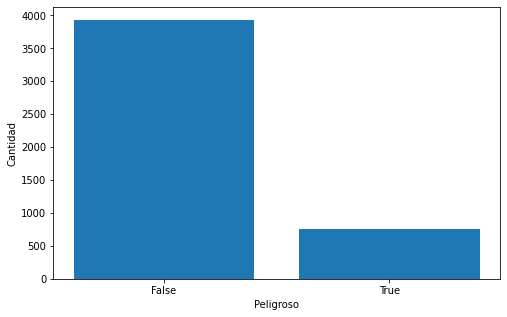

In [ ]:
# grafica cantidad de asteroides peligrosos
plt.figure(figsize=(8,5))
plt.bar(["False", "True"], dt.Hazardous.value_counts().astype(int))
plt.xlabel("Peligroso"), plt.ylabel("Cantidad")

In [ ]:
danger, ndanger = dt.Hazardous.value_counts()

# valores exactos
print("Peligrosos = ", danger)
print("No peligrosos = ", ndanger)

Peligrosos =  3932
No peligrosos =  755


In [ ]:
# porcentajes
print("Porcentaje de No peligrosos = ", (danger/dt.shape[0])*100)
print("Porcentaje de Peligrosos = ", (ndanger/dt.shape[0])*100)

Porcentaje de No peligrosos =  83.89161510561127
Porcentaje de Peligrosos =  16.108384894388735


# TPR y TNR

Para tener más claridad sobre el funcionamiento del modelo hallaremos el TPR y el TNR.

* **TPR:** tasa de verdaderos positivos (sensibilidad), el procentaje de asteorides peligrosos que se clasificaron correctamente como peligrosos.
* **TNR:** tasa negativa verdadera (especificidad), el porcentaje de asteroides no peligrosos que se clasificaron correctamente como no peligrosos.

In [ ]:
def tpr(est,prediction,y):
    p = prediction
    return np.mean (p[y==1] == y[y==1])

def tnr(est,prediction,y):
    p = prediction
    return np.mean(p[y==0] == y[y==0])

# **CREACIÓN DE MODELOS**

Como hay muy pocos clasificados como *peligrosos* tenemos que tener cuidado de como se reparten los datos para traint y test.

In [ ]:
# preparacion de data para entrenamiento y test
x = dt.values[:,:-1]
y = dt.values[:,-1]

accuracys = []
acurracys_sc = []

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.5)

# Se verifica el porcentaje que quedo en train y test

In [ ]:
# Verificamos cuantos datos con la etiqueta peligroso quedaron en y_test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.5)
pel = np.count_nonzero(y_test == 1)/dt.Hazardous.value_counts()[1] 
print("% Peligrosos en y_test = ", pel)

% Peligrosos en y_test =  0.5086092715231788


In [ ]:
accuracys = [0.0]
acurracys_sc = [0.0]

## GaussianNB

In [ ]:
# Modelo GaussianNB

GN = GaussianNB()
GN.fit(x_train, y_train)

prediction = GN.predict(x_test)
prediction_train = GN.predict(x_train)

s = accuracy_score(y_test, prediction)*100
accuracys.append(s)
print(f'accuracy = {round(s, 4)}')
s = tpr(GN, prediction, y_test)*100
print(f'tpn = {round(s, 4)}')
s = tnr(GN, prediction, y_test)*100
print(f'tnr = {round(s, 4)}')

cm_test = confusion_matrix(y_test, prediction)
cm_train = confusion_matrix(y_train, prediction_train)
print("")
print( "matrix de confusión en train\n", cm_train)
print ("matrix de confusión en test\n", cm_test)

accuracy = 82.2952
tpn = 5.7292
tnr = 97.2959

matrix de confusión en train
 [[1923   49]
 [ 343   28]]
matrix de confusión en test
 [[1907   53]
 [ 362   22]]


## RandomForestClassifier

In [ ]:
# Modelo RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

prediction = RFC.predict(x_test)
prediction_train = RFC.predict(x_train)

s = accuracy_score(y_test, prediction)*100
accuracys.append(s)
print(f'accuracy = {round(s, 4)}')
s = tpr(RFC, prediction, y_test)*100
print(f'tpn = {round(s, 4)}')
s = tnr(RFC, prediction, y_test)*100
print(f'tnr = {round(s, 4)}')

RFC_apophis = RFC

cm_test = confusion_matrix(y_test, prediction)
cm_train = confusion_matrix(y_train, prediction_train)
print("")
print( "matrix de confusión en train\n", cm_train)
print ("matrix de confusión en test\n", cm_test)

accuracy = 99.5734
tpn = 98.4375
tnr = 99.7959

matrix de confusión en train
 [[1972    0]
 [   0  371]]
matrix de confusión en test
 [[1956    4]
 [   6  378]]


## DecisionTreeClassifier

In [ ]:
# Modelo DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)

prediction = DTC.predict(x_test)
prediction_train = DTC.predict(x_train)

s = accuracy_score(y_test, prediction)*100
accuracys.append(s)
print(f'accuracy = {round(s, 4)}')
s = tpr(DTC, prediction, y_test)*100
print(f'tpn = {round(s, 4)}')
s = tnr(DTC, prediction, y_test)*100
print(f'tnr = {round(s, 4)}')

cm_test = confusion_matrix(y_test, prediction)
cm_train = confusion_matrix(y_train, prediction_train)
print("")
print( "matrix de confusión en train\n", cm_train)
print ("matrix de confusión en test\n", cm_test)

accuracy = 99.4881
tpn = 98.1771
tnr = 99.7449

matrix de confusión en train
 [[1972    0]
 [   0  371]]
matrix de confusión en test
 [[1955    5]
 [   7  377]]


## SVC

In [ ]:
# Modelo SVC
from sklearn.svm import SVC

SVC = SVC(kernel='sigmoid')
SVC.fit(x_train, y_train)

prediction = SVC.predict(x_test)
prediction_train = SVC.predict(x_train)

s = accuracy_score(y_test, prediction)*100
accuracys.append(s)
print(f'accuracy = {round(s, 4)}')
s = tpr(SVC, prediction, y_test)*100
print(f'tpn = {round(s, 4)}')
s = tnr(SVC, prediction, y_test)*100
print(f'tnr = {round(s, 4)}')

cm_test = confusion_matrix(y_test, prediction)
cm_train = confusion_matrix(y_train, prediction_train)
print("")
print( "matrix de confusión en train\n", cm_train)
print ("matrix de confusión en test\n", cm_test)

accuracy = 74.5307
tpn = 9.1146
tnr = 87.3469

matrix de confusión en train
 [[1710  262]
 [ 322   49]]
matrix de confusión en test
 [[1712  248]
 [ 349   35]]


## DNN

In [ ]:
# modelo DNN
keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape= x_train[0].shape),
    tf.keras.layers.Dense(750, activation='relu'),
    tf.keras.layers.Dense(500, activation='relu'),                             
    tf.keras.layers.Dense(250, activation='relu'),                             
    tf.keras.layers.Dense(125, activation='relu'),                             
    tf.keras.layers.Dense(2, activation='sigmoid')               
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 18)                0         
_________________________________________________________________
dense (Dense)                (None, 750)               14250     
_________________________________________________________________
dense_1 (Dense)              (None, 500)               375500    
_________________________________________________________________
dense_2 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_3 (Dense)              (None, 125)               31375     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 252       
Total params: 546,627
Trainable params: 546,627
Non-trainable params: 0
__________________________________________________

In [ ]:
# one hot encoding

print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes=2)

print("y_train_ohe: ", y_train_ohe.shape)
print("y_test_ohe: ", y_test_ohe.shape)

y_train:  (2343,)
y_test:  (2344,)
y_train_ohe:  (2343, 2)
y_test_ohe:  (2344, 2)


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train_ohe, epochs=15)

Epoch 1/15
74/74 [==============================] - 1s 8ms/step - loss: 146290.7500 - accuracy: 0.7943
Epoch 2/15
74/74 [==============================] - 1s 8ms/step - loss: 28702.3848 - accuracy: 0.7832
Epoch 3/15
74/74 [==============================] - 1s 8ms/step - loss: 7288.4038 - accuracy: 0.8310
Epoch 4/15
74/74 [==============================] - 1s 8ms/step - loss: 7606.5898 - accuracy: 0.7926
Epoch 5/15
74/74 [==============================] - 1s 8ms/step - loss: 5644.7217 - accuracy: 0.8160
Epoch 6/15
74/74 [==============================] - 1s 8ms/step - loss: 4206.0176 - accuracy: 0.7828
Epoch 7/15
74/74 [==============================] - 1s 9ms/step - loss: 4623.1802 - accuracy: 0.8050
Epoch 8/15
74/74 [==============================] - 1s 8ms/step - loss: 3075.4988 - accuracy: 0.8084
Epoch 9/15
74/74 [==============================] - 1s 8ms/step - loss: 2297.5100 - accuracy: 0.8357
Epoch 10/15
74/74 [==============================] - 1s 8ms/step - loss: 945.6121 - accu

In [ ]:
scores = model.evaluate(x_train, y_train_ohe, verbose=False)
print("Training Accuracy: %.4f%%\n" % (scores[1]*100))
scores = model.evaluate(x_test, y_test_ohe, verbose=False)
accuracys.append(scores[1]*100)
print("Testing Accuracy: %.4f%%\n" % (scores[1]*100))

Training Accuracy: 84.1656%

Testing Accuracy: 83.6177%



In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test_ohe)


74/74 [==============================] - 0s 3ms/step - loss: 289.8164 - accuracy: 0.8362


# Modelos aplicando StandarScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_std=True)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## GaussianNB

In [ ]:
# Modelo GaussianNB

GN = GaussianNB()
GN.fit(x_train, y_train)

prediction = GN.predict(x_test)
prediction_train = GN.predict(x_train)

s = accuracy_score(y_test, prediction)*100
acurracys_sc.append(s)
print(f'accuracy = {round(s, 4)}')
s = tpr(GN, prediction, y_test)*100
print(f'tpn = {round(s, 4)}')
s = tnr(GN, prediction, y_test)*100
print(f'tnr = {round(s, 4)}')

cm_test = confusion_matrix(y_test, prediction)
cm_train = confusion_matrix(y_train, prediction_train)
print("")
print( "matrix de confusión en train\n", cm_train)
print ("matrix de confusión en test\n", cm_test)

accuracy = 94.6672
tpn = 85.4167
tnr = 96.4796

matrix de confusión en train
 [[1919   53]
 [  53  318]]
matrix de confusión en test
 [[1891   69]
 [  56  328]]


## RandomForestClassifier

In [ ]:
# Modelo RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

prediction = RFC.predict(x_test)
prediction_train = RFC.predict(x_train)

s = accuracy_score(y_test, prediction)*100
acurracys_sc.append(s)
print(f'accuracy = {round(s, 4)}')
s = tpr(RFC, prediction, y_test)*100
print(f'tpn = {round(s, 4)}')
s = tnr(RFC, prediction, y_test)*100
print(f'tnr = {round(s, 4)}')

cm_test = confusion_matrix(y_test, prediction)
cm_train = confusion_matrix(y_train, prediction_train)
print("")
print( "matrix de confusión en train\n", cm_train)
print ("matrix de confusión en test\n", cm_test)

accuracy = 99.5307
tpn = 98.1771
tnr = 99.7959

matrix de confusión en train
 [[1972    0]
 [   0  371]]
matrix de confusión en test
 [[1956    4]
 [   7  377]]


## DecisionTreeClassifier

In [ ]:
# Modelo DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)

prediction = DTC.predict(x_test)
prediction_train = DTC.predict(x_train)

s = accuracy_score(y_test, prediction)*100
acurracys_sc.append(s)
print(f'accuracy = {round(s, 4)}')
s = tpr(DTC, prediction, y_test)*100
print(f'tpn = {round(s, 4)}')
s = tnr(DTC, prediction, y_test)*100
print(f'tnr = {round(s, 4)}')

cm_test = confusion_matrix(y_test, prediction)
cm_train = confusion_matrix(y_train, prediction_train)
print("")
print( "matrix de confusión en train\n", cm_train)
print ("matrix de confusión en test\n", cm_test)

accuracy = 99.4881
tpn = 97.9167
tnr = 99.7959

matrix de confusión en train
 [[1972    0]
 [   0  371]]
matrix de confusión en test
 [[1956    4]
 [   8  376]]


## SVC

In [ ]:
# Modelo SVC
from sklearn.svm import SVC

SVC = SVC(kernel='sigmoid')
SVC.fit(x_train, y_train)

prediction = SVC.predict(x_test)
prediction_train = SVC.predict(x_train)

s = accuracy_score(y_test, prediction)*100
acurracys_sc.append(s)
print(f'accuracy = {round(s, 4)}')
s = tpr(SVC, prediction, y_test)*100
print(f'tpn = {round(s, 4)}')
s = tnr(SVC, prediction, y_test)*100
print(f'tnr = {round(s, 4)}')

cm_test = confusion_matrix(y_test, prediction)
cm_train = confusion_matrix(y_train, prediction_train)
print("")
print( "matrix de confusión en train\n", cm_train)
print ("matrix de confusión en test\n", cm_test)

accuracy = 87.0307
tpn = 55.7292
tnr = 93.1633

matrix de confusión en train
 [[1825  147]
 [ 179  192]]
matrix de confusión en test
 [[1826  134]
 [ 170  214]]


## DNN

In [ ]:
# modelo DNN
keras.backend.clear_session()

model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape= x_train[0].shape),
    tf.keras.layers.Dense(750, activation='relu'),
    tf.keras.layers.Dense(500, activation='relu'),                             
    tf.keras.layers.Dense(250, activation='relu'),                             
    tf.keras.layers.Dense(125, activation='relu'),                             
    tf.keras.layers.Dense(2, activation='sigmoid')               
])

model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 18)                0         
_________________________________________________________________
dense (Dense)                (None, 750)               14250     
_________________________________________________________________
dense_1 (Dense)              (None, 500)               375500    
_________________________________________________________________
dense_2 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_3 (Dense)              (None, 125)               31375     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 252       
Total params: 546,627
Trainable params: 546,627
Non-trainable params: 0
__________________________________________________

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model2.fit(x_train, y_train_ohe, epochs=15)

Epoch 1/15
74/74 [==============================] - 1s 9ms/step - loss: 0.2278 - accuracy: 0.9040
Epoch 2/15
74/74 [==============================] - 1s 9ms/step - loss: 0.1114 - accuracy: 0.9535
Epoch 3/15
74/74 [==============================] - 1s 9ms/step - loss: 0.0785 - accuracy: 0.9706
Epoch 4/15
74/74 [==============================] - 1s 9ms/step - loss: 0.0663 - accuracy: 0.9744
Epoch 5/15
74/74 [==============================] - 1s 9ms/step - loss: 0.0506 - accuracy: 0.9804
Epoch 6/15
74/74 [==============================] - 1s 9ms/step - loss: 0.0476 - accuracy: 0.9787
Epoch 7/15
74/74 [==============================] - 1s 9ms/step - loss: 0.0590 - accuracy: 0.9799
Epoch 8/15
74/74 [==============================] - 1s 9ms/step - loss: 0.0280 - accuracy: 0.9880
Epoch 9/15
74/74 [==============================] - 1s 9ms/step - loss: 0.0384 - accuracy: 0.9859
Epoch 10/15
74/74 [==============================] - 1s 9ms/step - loss: 0.0207 - accuracy: 0.9919
Epoch 11/15
74/74 [

In [ ]:
scores = model2.evaluate(x_train, y_train_ohe, verbose=False)
print("Training Accuracy: %.4f%%\n" % (scores[1]*100))
scores = model2.evaluate(x_test, y_test_ohe, verbose=False)
acurracys_sc.append(scores[1]*100)
print("Testing Accuracy: %.4f%%\n" % (scores[1]*100))

Training Accuracy: 100.0000%

Testing Accuracy: 98.4215%



In [ ]:
test_loss, test_acc = model2.evaluate(x_test, y_test_ohe)

74/74 [==============================] - 0s 3ms/step - loss: 0.0749 - accuracy: 0.9842


# CONCLUSIONES

Como se puede observar, implementamos 5 modelos diferentes:
* GaussinaNB
* RandomForestClassifier
* DecisionTreeClassifier
* SVC
* DNN



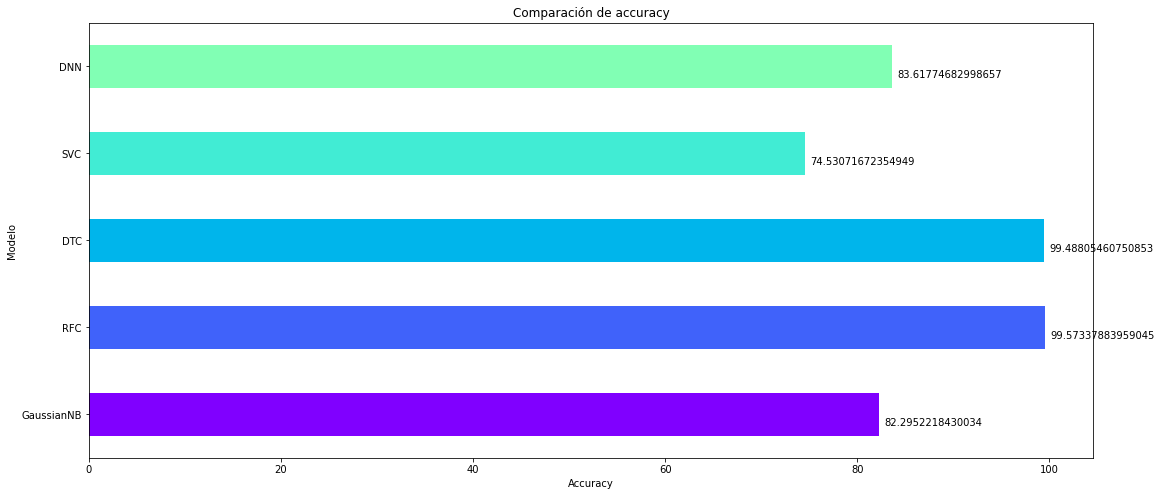

In [ ]:
#@title Gráfica { display-mode: "form" }

s = pd.Series(
      accuracys[1:],
      index = ['GaussianNB', 'RFC', 'DTC', 'SVC', 'DNN']
    )

plt.figure(figsize=(18,8))
# plt.rcParams['figure.figsize'] = (15,5)
plt.title("Comparación de accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Modelo")

color = plt.cm.rainbow(np.linspace(0, 1, 9))

ax = s.plot(kind='barh' , color = color)

for p in ax.patches:
  ax.annotate(str(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points')

Ahora veamos la gráfica de los modelos al aplicarle StandarScaler a los datos

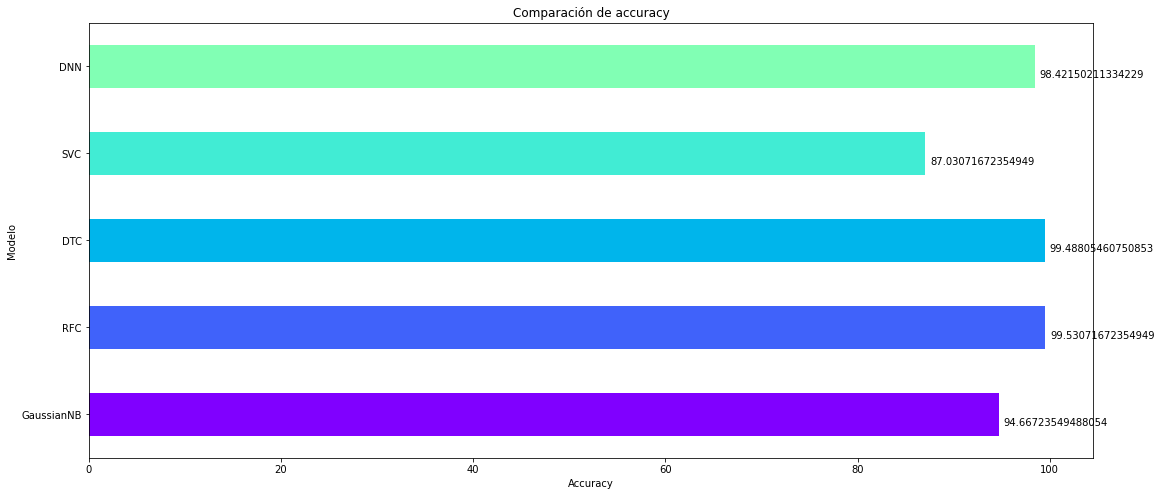

In [ ]:
#@title Gráfica modelos con StandarScaler{ display-mode: "form" }

s = pd.Series(
      acurracys_sc[1:],
      index = ['GaussianNB', 'RFC', 'DTC', 'SVC', 'DNN']
    )

plt.figure(figsize=(18,8))
# plt.rcParams['figure.figsize'] = (15,5)
plt.title("Comparación de accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Modelo")

color = plt.cm.rainbow(np.linspace(0, 1, 9))

ax = s.plot(kind='barh' , color = color)

for p in ax.patches:
  ax.annotate(str(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points')

Nos damos cuenta que el **RandomForestClassifier** es el mejor en ambos casos, logrando un accuracy de

In [ ]:
acurracys_sc[2]

99.53071672354949

## Prueba de clasificación de Apophis con el modelo RFC

In [ ]:
apophis

,Absolute Magnitude,Est Dia in KM(max),Relative Velocity km per hr,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
1788,19.7,0.682402,29157.339418,40075876.0,0,0.000659,6.467,2454441.5,0.19108,3.33129,204.45719,323.513069,0.74605,126.393641,1.098507,2.454571e+06,215.539978,1.112783,1
3649,19.7,0.682402,24218.702846,36398272.0,0,0.000659,6.467,2454441.5,0.19108,3.33129,204.45719,323.513069,0.74605,126.393641,1.098507,2.454571e+06,215.539978,1.112783,1


In [ ]:
apophis = apophis.values[:,:-1]

In [ ]:
pred = RFC_apophis.predict(apophis)
pred

array([1., 1.])

Para ambos registros de Apophis el modelo lo clasifico como peligroso